## Final Project Submission

Please fill out:
* Student name: Chris Choi
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Microsoft Goes to the Movies — A Data-Driven Approach

## Overview
Originating in the early 20th century, the global film industry today represents one of the world's most illustrious and capital-intensive enterprises. Prior to 2020, the industry showed consistent growth; in 2019 it generated more than 42 billion US dollars. In addition to the industry's size, movies are well-known to offer substantial profit opportunities and potential return on investment.

As major corporations like Microsoft seek to diversify their revenue streams in an increasingly globalized marketplace, a venture into the film industry may prove to be promising business strategy. Here, we will use a data-driven approach that incorporates the latest technologies along with proven statistical methods in order to analyze large public datasets. We will use these to generate visualizations as well as actionable insights to maximize the probability of success at the box office.

## Business Problem

Given the size and complexity of the movie industry, it is important that we identify the key features shared by financially successful movies. By conducting preliminary analysis of consumer trends and patterns, we will have an easier time avoiding common costly mistakes such as releasing a potential blockbuster movie targeting the wrong audience or the wrong time of year. We will also seek to analyze the profitability of movies in addition to raw revenues.

In this project, we seek to constructively pose and answer the following three questions with concrete, actionable insights:

- What is the best time of year (month and season) to release a movie so as to maximize sales and ROI?
- What are the most successful genres in terms of sales and ROI?
- What is the ideal length of a successful movie? Are longer movies more successful than shorter movies?

## Data Understanding

A number of large and reliable datasets featuring movies can be found on the internet. We will be using data files derived from the popular website IMDb.com (Internet Movie Database) and The-Numbers.com to conduct our analysis. These data files provide the titles, release date, production budgets, domestic and global sales, and other relevant figures for thousands of movies released over decades.

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Allow plots to be displayed in notebook
%matplotlib inline

In [2]:
# Set style parameters for graphs
sns.set_context('poster')
plt.style.use('fivethirtyeight')

# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Use pandas to load .csv data into dataframes
budgets_df = pd.read_csv('data/tn.movie_budgets.csv/tn.movie_budgets.csv', index_col='movie')
genre_df = pd.read_csv('data/imdb.title.basics.csv/title.basics.csv', index_col='primary_title')

In [4]:
budgets_df.info

<bound method DataFrame.info of                                              id  release_date  \
movie                                                           
Avatar                                        1  Dec 18, 2009   
Pirates of the Caribbean: On Stranger Tides   2  May 20, 2011   
Dark Phoenix                                  3   Jun 7, 2019   
Avengers: Age of Ultron                       4   May 1, 2015   
Star Wars Ep. VIII: The Last Jedi             5  Dec 15, 2017   
...                                          ..           ...   
Red 11                                       78  Dec 31, 2018   
Following                                    79   Apr 2, 1999   
Return to the Land of Wonders                80  Jul 13, 2005   
A Plague So Pleasant                         81  Sep 29, 2015   
My Date With Drew                            82   Aug 5, 2005   

                                            production_budget domestic_gross  \
movie                                     

In [5]:
genre_df.info

<bound method DataFrame.info of                                                 tconst  \
primary_title                                            
Sunghursh                                    tt0063540   
One Day Before the Rainy Season              tt0066787   
The Other Side of the Wind                   tt0069049   
Sabse Bada Sukh                              tt0069204   
The Wandering Soap Opera                     tt0100275   
...                                                ...   
Kuambil Lagi Hatiku                          tt9916538   
Rodolpho Teóphilo - O Legado de um Pioneiro  tt9916622   
Dankyavar Danka                              tt9916706   
6 Gunn                                       tt9916730   
Chico Albuquerque - Revelações               tt9916754   

                                                                          original_title  \
primary_title                                                                              
Sunghursh                    

### The-Numbers Dataset

The-Numbers dataset includes records from 2015 to 2020. It records the title, release date, production budget, and domestic and worldwide gross figures. It is imported as budgets_df.

In [6]:
budgets_df.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Convert release dates to pandas datetime format for easier processing
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

### IMDb Dataset

The IMDb dataset includes title, genres and runtime minutes. It is imported as genre_df.

In [8]:
genre_df.head()

,tconst,original_title,start_year,runtime_minutes,genres
primary_title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.00,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.00,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [37]:
genre_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [10]:
genre_df['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Crime,Family,Thriller             1
Adult,Comedy                      1
Comedy,Documentary,Western        1
Documentary,Music,Western         1
Family,Musical,Sport              1
Name: genres, Length: 1085, dtype: int64

## Data Preparation

### Data Merging and Cleaning

In this section, I will first join the The-Numbers and IMDb dataframes into a new dataframe called budgets_genre_df. After, I will clean the new dataframe by dropping unnecessary columns.

In [11]:
# Join on the basis that both use movie titles as indexes
budgets_genre_df = budgets_df.join(genre_df, how='inner')

# Drop unnecessary or redundant columns
budgets_genre_df = budgets_genre_df.drop(['tconst', 'start_year', 'id'], axis=1)

# Adjust indexes
budgets_genre_df.set_index('original_title', inplace=True)
budgets_genre_df = budgets_genre_df.reset_index()
budgets_genre_df.head()

,original_title,release_date,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres
0,#Horror,2015-11-20,"$1,500,000",$0,$0,101.00,"Crime,Drama,Horror"
1,10 Cloverfield Lane,2016-03-11,"$5,000,000","$72,082,999","$108,286,422",103.00,"Drama,Horror,Mystery"
2,10 Days in a Madhouse,2015-11-11,"$12,000,000","$14,616","$14,616",111.00,Drama
3,12 Rounds,2009-03-27,"$20,000,000","$12,234,694","$17,306,648",nan,"Action,Drama,Romance"
4,12 Strong,2018-01-19,"$35,000,000","$45,819,713","$71,118,378",130.00,"Action,Drama,History"


In the next step, I will visualize and remove duplicate or invalid entries. A preliminary check of the main dataframe reveals up to 1732 missing and/or duplicated values. While a substantial portion of the dataset in percentage terms, the remaining ~2400 entries should still provide us with enough raw data points to generate the market insights we are seeking with reasonable power.

In [12]:
# Find number of rows
budgets_genre_df.shape

(3815, 7)

In [13]:
# Check for missing and/or duplicated values
display(budgets_genre_df.duplicated(subset=['original_title', 'release_date']).value_counts())
budgets_genre_df.isna().sum()

False    2643
True     1172
dtype: int64

original_title         1
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
runtime_minutes      487
genres                72
dtype: int64

In [14]:
# Visually inspect duplicated data
budgets_genre_df[budgets_genre_df.duplicated(keep=False)].sort_values(by='original_title').head()

,original_title,release_date,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres
455,Brothers,2009-12-04,"$26,000,000","$28,544,157","$45,043,870",nan,Action
463,Brothers,2009-12-04,"$26,000,000","$28,544,157","$45,043,870",nan,Action
468,Brothers,2015-08-14,"$13,000,000","$656,688","$17,856,688",nan,Action
476,Brothers,2015-08-14,"$13,000,000","$656,688","$17,856,688",nan,Action
778,Detention,2012-04-13,"$10,000,000",$0,$0,nan,Horror


In [15]:
# Drop duplicate and missing entries
budgets_genre_df = budgets_genre_df.drop_duplicates(subset=['original_title', 'release_date'], inplace=False)
budgets_genre_df = budgets_genre_df.dropna()

# Check remaining entries
budgets_genre_df.shape

(2427, 7)

In [16]:
# Make columns using dollar values easier to use by normalizing the formatting.
def clean_dollar_strings(df, column_name):
    '''Convert dollar amounts from strings to floats and remove commas and '$' sign'''
    if df[column_name].dtype != float: 
        df[column_name] = df[column_name].apply(lambda x: x.strip('$'))
        df[column_name] = df[column_name].apply(lambda x: x.replace(',',''))
        df[column_name] = df[column_name].astype(float)

# Apply above function to relevant columns
budget_list = ['production_budget', 'domestic_gross', 'worldwide_gross']
for item in budget_list:
    clean_dollar_strings(budgets_genre_df, item)

### Feature Engineering

I create a `net_profit` column by subtracting the production budget from the worldwide gross

In [17]:
budgets_genre_df['net_profit'] = budgets_genre_df['worldwide_gross'] - budgets_genre_df['production_budget']

I create a `release_month` column by subtracting the production budget from the worldwide gross

In [18]:
budgets_genre_df['release_month'] = budgets_genre_df['release_date'].dt.month

I create dictionaries for months and seasons in order to create a `release_season` column as well as for use in visualizations below.

In [19]:
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
season_dict = {1:'Spring (Q1)', 2:'Spring (Q1)', 3:'Spring (Q1)', 4: 'Summer (Q2)', 5:'Summer (Q2)', 6:'Summer (Q2)', 7:'Fall (Q3)', 8:'Fall (Q3)', 9:'Fall (Q3)', 10:'Winter (Q4)', 11:'Winter (Q4)', 12:'Winter (Q4)'}
budgets_genre_df['release_season'] = budgets_genre_df['release_month'].replace(season_dict)

In [20]:
# Save cleaned dataset as CSV
budgets_genre_df.to_csv('./budgets_genre_df.csv')

## Analysis

### Gross Sales and Net Profits by Month

The chart shows the gross worldwide sales and net profit of the average movie for each month of the year. The best selling and most profitable months of the year are May, June, July, and November. The worst performing months of the year are the fall months (Aug, Sep, Oct) and January. Notably, the ratio between production budget and gross sales remains relatively constant.

In [21]:
# We need the monthly sales and profits, so we will group by release month
graphs_df = budgets_genre_df.groupby(by='release_month').mean()

# Drop unneccessary columns
graphs_df = graphs_df.drop(['domestic_gross', 'runtime_minutes', 'production_budget'], axis=1)

# This column is a construct needed for the stacked bar chart 
graphs_df['grossplusprofit'] = graphs_df['worldwide_gross'] + graphs_df['net_profit']

graphs_df = graphs_df.reset_index()

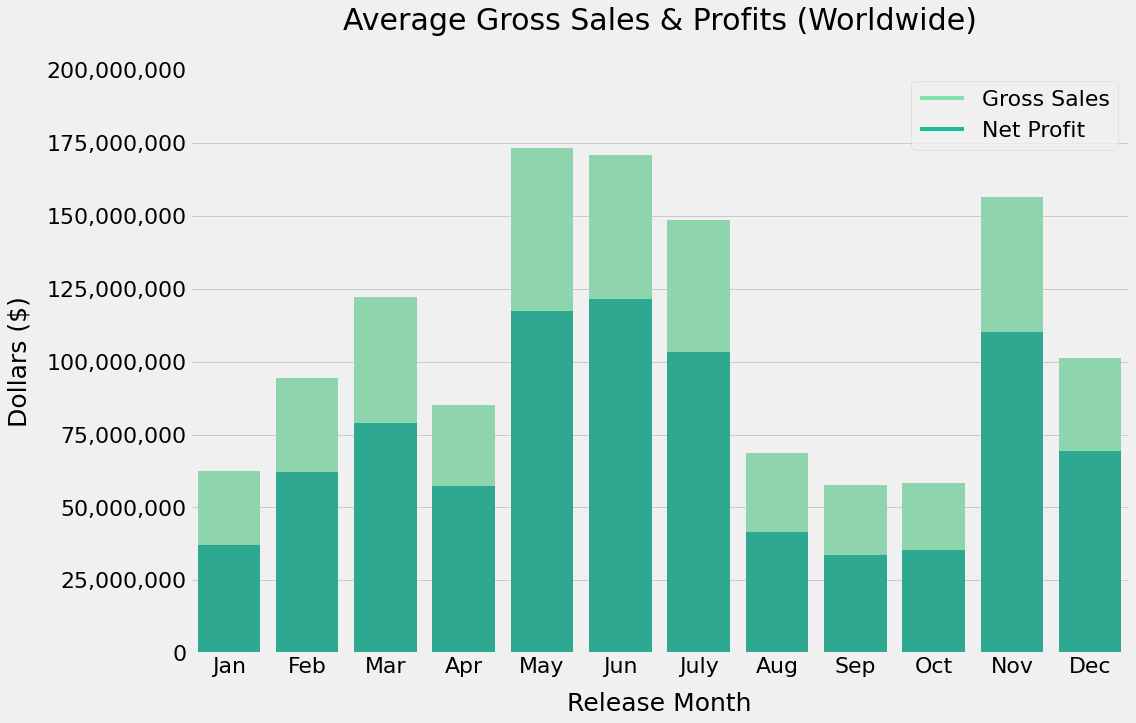

In [22]:
# The first visualization is a barplot that shows the net profit and gross worldwide 
# sales of the average movie released in each month

plt.figure(figsize=(15,10))

#Plot 1 - background - "total" (top) series
ax_top = sns.barplot(x = graphs_df['release_month'], y = graphs_df['worldwide_gross'], color = "#82E0AA")

#Plot 2 - overlay - "bottom" series
ax_bot = sns.barplot(x = graphs_df['release_month'], y = graphs_df['net_profit'], color = '#1ABC9C')

# Set x and y labels and title
ax_top.set_xticklabels(month_dict.values());
ax_top.set_ylim(0,200000000)
ax_top.set_ylabel('Dollars ($)', labelpad=15, fontdict = {'fontsize':25})
ax_top.set_xlabel('Release Month', labelpad=15, fontdict = {'fontsize':25})
plt.title('Average Gross Sales & Profits (Worldwide)', fontdict = {'fontsize':30}, pad=40)
plt.savefig('./figures/SalesByMonth.png')

# Format dollar amounts to display original value
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax_top.yaxis.set_major_formatter(tick) 

# Legend
legend_elements = [Line2D([0], [0], color='#82E0AA', lw=4, label='Gross Sales'),
Line2D([0], [0], color='#1ABC9C', lw=4, label='Net Profit')]
plt.legend(handles=legend_elements, loc='upper right');

### Gross Sales and Net Profits by Season (or Quarter)

This chart is similar to the previous chart, except it groups the average movie sales by seasons/quarters instead of months. The summer season (Q2) is by far the best performing season in terms of revenues and profits, followed by winter (Q4). Spring (Q1) and fall (Q2) are virtually identical.

In [23]:
graphs_df_2 = budgets_genre_df.groupby(by='release_season').mean()
graphs_df_2 = graphs_df_2.reset_index()

# Reindex to change season order display to 'Spring' -> 'Summer' -> 'Fall' -> 'Winter'
idx = [1,2,0,3]
graphs_df_2 = graphs_df_2.reindex(idx)

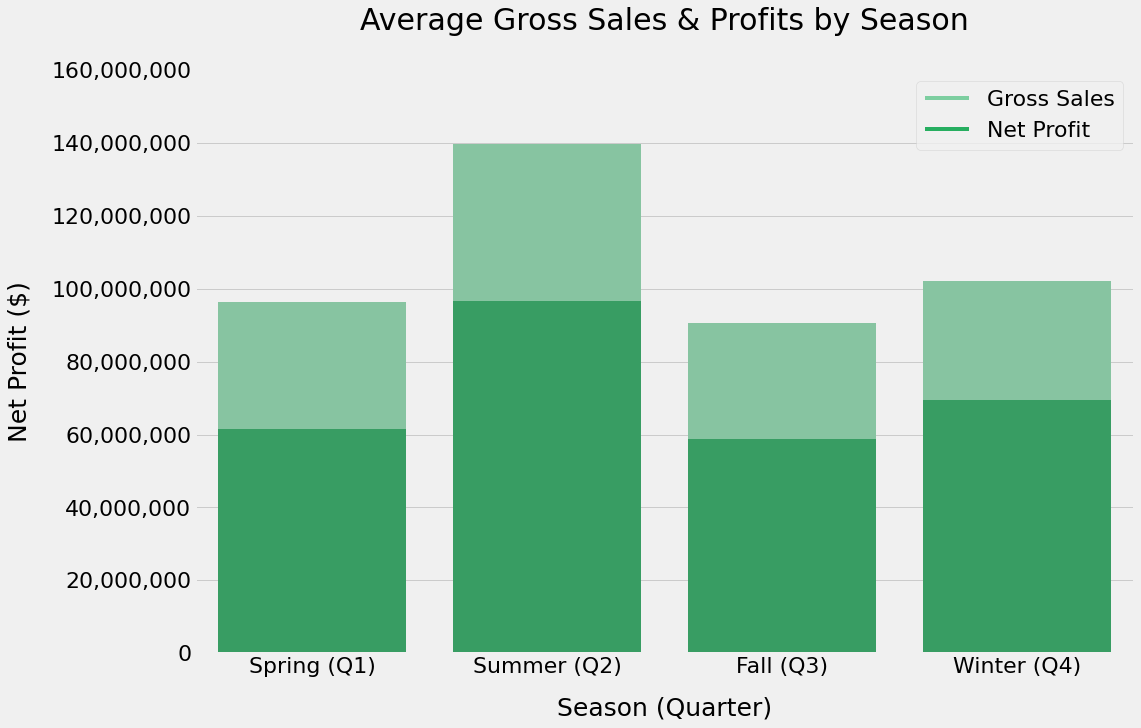

In [24]:
fig2 = plt.figure(figsize=(15,10))

# Plot 1 - background - "total" (top) series
ax2_top = sns.barplot(x = graphs_df_2['release_season'], y = graphs_df_2['worldwide_gross'], color = '#7DCEA0')

# Plot 2 - overlay - "bottom" series
ax2_bot = sns.barplot(x = graphs_df_2['release_season'], y = graphs_df_2['net_profit'], color = '#27AE60')

# Format y-labels
tick2 = mtick.StrMethodFormatter(fmt)
ax2_top.yaxis.set_major_formatter(tick) 

ax2_top.set_ylim(0, 160000000)
# ax2_top.set_xticklabels(season_dict2.keys());
ax2_top.set_ylabel('Net Profit ($)', labelpad=20, fontdict = {'fontsize' : 25})
ax2_top.set_xlabel('Season (Quarter)', labelpad=20, fontdict = {'fontsize' : 25})
plt.title('Average Gross Sales & Profits by Season', fontdict = {'fontsize' : 30},pad=40)

legend_elements = [Line2D([0], [0], color='#7DCEA0', lw=4, label='Gross Sales'),
Line2D([0], [0], color='#27AE60', lw=4, label='Net Profit')]

l = plt.legend(handles=legend_elements, loc='upper right')

### Profitability by Genre

This chart shows the average net profit per each genre category. The most profitable genres (defined here as earning over 100 M in profit) are Animation, Adventure, Sci-Fi, Musical, Fantasy, Action, and Family. The two most profitable genres are Animation and Adventure with over 200 M in profit. The least profitable genres are War, History, Documentary, Western and News.

In [25]:
budgets_genre_df['genres'] = budgets_genre_df['genres'].map(lambda x: x.split(','))

budgets_genre_df.head()

,original_title,release_date,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,net_profit,release_month,release_season
0,#Horror,2015-11-20,1500000.00,0.00,0.00,101.00,"[Crime, Drama, Horror]",-1500000.00,11,Winter (Q4)
1,10 Cloverfield Lane,2016-03-11,5000000.00,72082999.00,108286422.00,103.00,"[Drama, Horror, Mystery]",103286422.00,3,Spring (Q1)
2,10 Days in a Madhouse,2015-11-11,12000000.00,14616.00,14616.00,111.00,[Drama],-11985384.00,11,Winter (Q4)
4,12 Strong,2018-01-19,35000000.00,45819713.00,71118378.00,130.00,"[Action, Drama, History]",36118378.00,1,Spring (Q1)
5,12 Years a Slave,2013-10-18,20000000.00,56671993.00,181025343.00,134.00,"[Biography, Drama, History]",161025343.00,10,Winter (Q4)


In [26]:
budgets_genre_df_2 = budgets_genre_df.explode('genres')

In [27]:
# Sort by genre and display mean values
budgets_genre_df_2 = budgets_genre_df_2.groupby('genres').mean().sort_values('net_profit', ascending=False)
budgets_genre_df_2 = budgets_genre_df_2.reset_index()

In [28]:
budgets_genre_df_2.head()

,genres,production_budget,domestic_gross,worldwide_gross,runtime_minutes,net_profit,release_month
0,Animation,85656925.62,114628820.27,310563862.39,92.28,224906936.77,6.97
1,Adventure,93029926.27,107449643.11,300968171.34,108.20,207938245.08,6.85
2,Sci-Fi,73317551.50,95115030.25,259892993.59,109.00,186575442.09,6.68
3,Musical,39105882.35,88724269.53,199807313.47,116.24,160701431.12,7.06
4,Fantasy,74731847.13,79938481.22,222127676.49,108.52,147395829.36,6.47


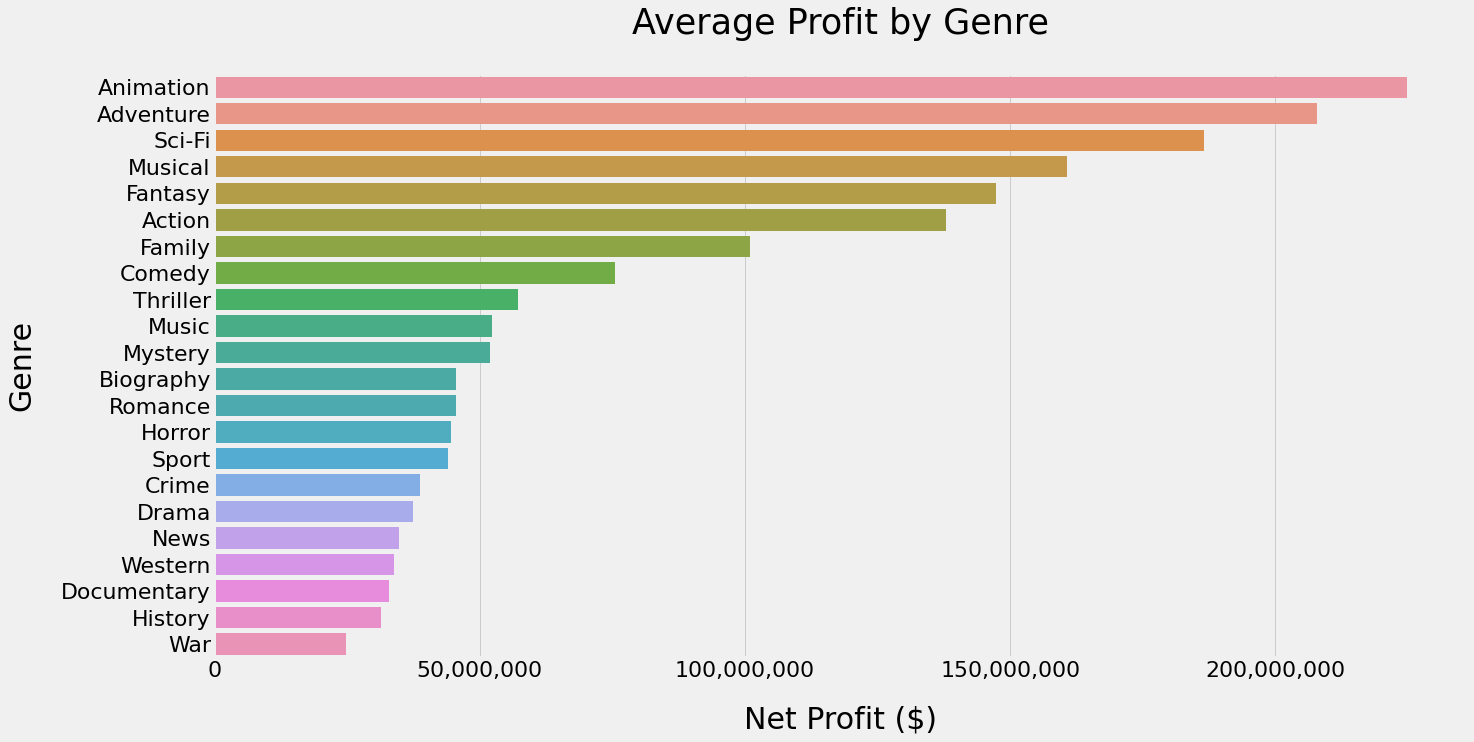

In [29]:
fig3 = plt.figure(figsize=(20,10))
ax3_top = sns.barplot(x = 'net_profit', y = 'genres', data=budgets_genre_df_2)

# Format dollar amounts to display original value
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax3_top.xaxis.set_major_formatter(tick) 

# Set chart label parameters
plt.title('Average Profit by Genre', fontdict = {'fontsize' : 35},pad=40)
ax3_top.set_ylabel('Genre', fontdict = {'fontsize':30}, labelpad=25)
ax3_top.set_xlabel('Net Profit ($)', fontdict = {'fontsize':30},labelpad=25);

### Impact of movie duration on profitability

This section explores the average profitability of a movie based on its relative duration. The median runtime value is found and used to divide the dataset into two bins: short and long. The average short movie vs. the average long movie are then compared. Long movies (duration > 100 minutes) are almost twice as profitable as short movies (duration < 100 minutes). 

In [30]:
budgets_genre_df['runtime_minutes'].describe()

count   2427.00
mean     101.29
std       23.23
min        1.00
25%       90.00
50%      100.00
75%      113.00
max      280.00
Name: runtime_minutes, dtype: float64

In [31]:
budgets_genre_df.head()

,original_title,release_date,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,net_profit,release_month,release_season
0,#Horror,2015-11-20,1500000.00,0.00,0.00,101.00,"[Crime, Drama, Horror]",-1500000.00,11,Winter (Q4)
1,10 Cloverfield Lane,2016-03-11,5000000.00,72082999.00,108286422.00,103.00,"[Drama, Horror, Mystery]",103286422.00,3,Spring (Q1)
2,10 Days in a Madhouse,2015-11-11,12000000.00,14616.00,14616.00,111.00,[Drama],-11985384.00,11,Winter (Q4)
4,12 Strong,2018-01-19,35000000.00,45819713.00,71118378.00,130.00,"[Action, Drama, History]",36118378.00,1,Spring (Q1)
5,12 Years a Slave,2013-10-18,20000000.00,56671993.00,181025343.00,134.00,"[Biography, Drama, History]",161025343.00,10,Winter (Q4)


<Figure size 1080x720 with 0 Axes>

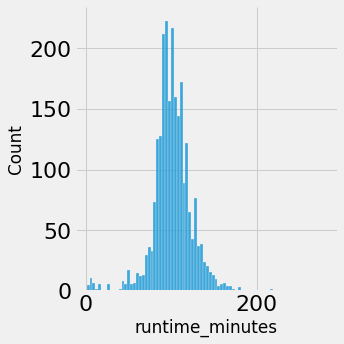

In [32]:
# Further confirmation of analytical strategy using histogram visualization
fig4 = plt.figure(figsize=(15,10))
ax4 = sns.displot(budgets_genre_df['runtime_minutes'], bins='auto');

In [33]:
# Create new column that classifies movies as 'long' or 'short' depending on whether they are above or below the median value of 100
budgets_genre_df['movie_length'] = budgets_genre_df['runtime_minutes'].apply(lambda x: 'short' if x <100 else 'long')

budgets_genre_df

,original_title,release_date,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,net_profit,release_month,release_season,movie_length
0,#Horror,2015-11-20,1500000.00,0.00,0.00,101.00,"[Crime, Drama, Horror]",-1500000.00,11,Winter (Q4),long
1,10 Cloverfield Lane,2016-03-11,5000000.00,72082999.00,108286422.00,103.00,"[Drama, Horror, Mystery]",103286422.00,3,Spring (Q1),long
2,10 Days in a Madhouse,2015-11-11,12000000.00,14616.00,14616.00,111.00,[Drama],-11985384.00,11,Winter (Q4),long
4,12 Strong,2018-01-19,35000000.00,45819713.00,71118378.00,130.00,"[Action, Drama, History]",36118378.00,1,Spring (Q1),long
5,12 Years a Slave,2013-10-18,20000000.00,56671993.00,181025343.00,134.00,"[Biography, Drama, History]",161025343.00,10,Winter (Q4),long
...,...,...,...,...,...,...,...,...,...,...,...
3807,Zoolander 2,2016-02-12,50000000.00,28848693.00,55348693.00,101.00,[Comedy],5348693.00,2,Spring (Q1),long
3808,Zoom,2006-08-11,35000000.00,11989328.00,12506188.00,96.00,"[Animation, Comedy, Drama]",-22493812.00,8,Fall (Q3),short
3812,Zootopia,2016-03-04,150000000.00,341268248.00,1019429616.00,108.00,"[Adventure, Animation, Comedy]",869429616.00,3,Spring (Q1),long
3813,Zulu,2013-12-31,16000000.00,0.00,1844228.00,110.00,"[Crime, Drama, Thriller]",-14155772.00,12,Winter (Q4),long


Text(0.5, 1.0, 'Net Profit by Movie Length')

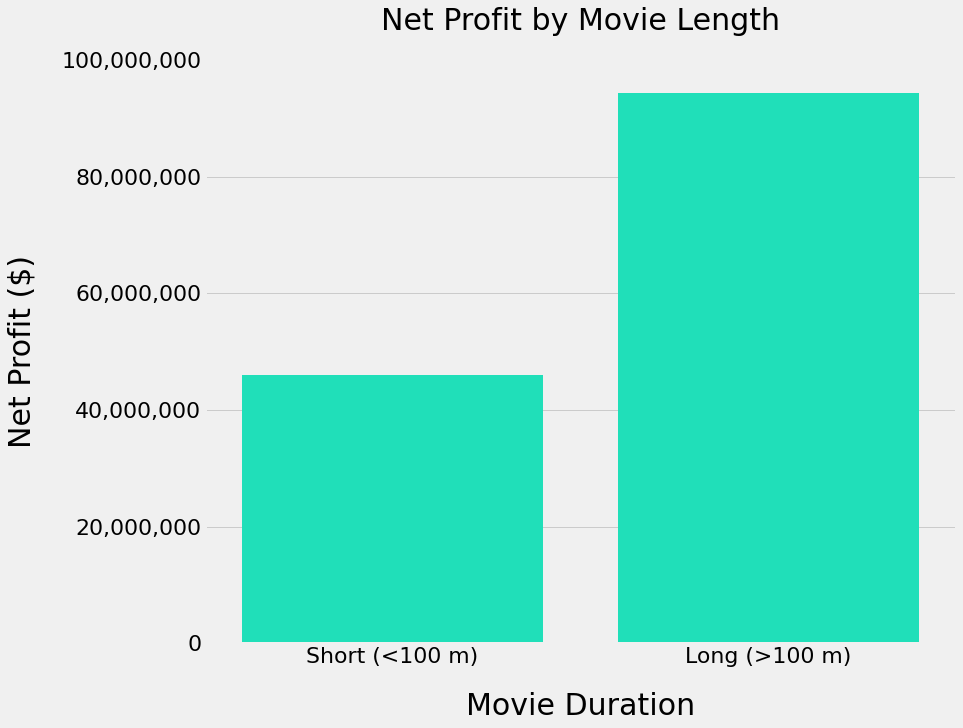

In [34]:
fig3 = plt.figure(figsize=(12,10))

# Required for x-axis label order
order_list = ['short', 'long']

# Plot barchart
ax3_top = sns.barplot(x = budgets_genre_df['movie_length'], y = budgets_genre_df['net_profit'], order=order_list, color = "#00FFCC", ci = None)

# Format y-tick labels to display full dollar quantity
tick2 = mtick.StrMethodFormatter(fmt)
ax3_top.yaxis.set_major_formatter(tick) 

ax3_top.set_ylabel('Net Profit ($)', fontdict = {'fontsize':30},labelpad=25)
ax3_top.set_xlabel('Movie Duration', fontdict = {'fontsize':30},labelpad=25)
ax3_top.set_xticklabels(['Short (<100 m)', 'Long (>100 m)'])
ax3_top.set_ylim(0, 100000000)
plt.title('Net Profit by Movie Length', fontdict={'fontsize':30}, pad=30)

# Conclusions

The results of this data analysis project leads us to three key actionable insights to achieve financial success in the global movie industry:
- **Target the summer months.** The chances of achieving superior results in both global revenues and net profits are markedly elevated in certain periods of the year. These four months exhibit unusually high sales numbers: May, June, July, and November. As a result, Microsoft should target these months for new movie releases as the data suggests consumer activity is elevated during these months. The months of August, September, and October should conversely be avoided unless a more advanced/targeted business strategy is being considered.
- **Avoid non-narrative or non-fiction genres.** There are major discrepancies in box office returns between different genres. The most profitable genres are Animation, Adventure, Sci-Fi, Musical, Fantasy, Action, and Family. The least profitable are War, History, Documentary, Western and News. This analysis suggests Microsoft should release fiction movies with elaborate narratives, production sets and special effects, as they appear more likely to draw large audiences.
- **Longer movies are more profitable.** Movies with a duration above the median (100 minutes) achieve returns almost twice that of shorter duration movies (under 100 minutes). The reason for this is not immediately obvious and should be explored in greater depth. Microsoft should focus on releasing longer-than-average features and should explore franchises with deep casts and long storylines that can be extended over multiple releases.

### Next Steps

Further analyses could yield additional insights to further improve sales and profit projections:
- **Conduct a more fine-grained analysis of release time data.** See if a pattern can be observed within the most profitable months, such as whether certain weeks within May, June, July, and November tend to outperform others, or if a mid-week release schedule is better than an end-of-week schedule.
- **Further explore the relationship between release time, genre, and length.** For example, do the summer month movies perform better because they tend to represent the most profitable genres and have greater durations? 
- **Model impact of franchise status on profit measures.** Movie franchises, particularly those based on the most popular genres and released in the busy season, may exhibit greater profitability than one-off movies.